# Stress Detection with Machine Learning

We live in an era where there is a surplus of information flowing in every second. Sometimes this leads to stress. ☹️
Too much stress can negatively impact our health and may lead to headaches, high blood pressure, heart problems, diabetes, skin conditions, asthma, arthritis, depression, and anxiety.

In [1]:
from IPython.display import Image

<img src="/kaggle/input/stressanalysisinsocialmedia/stress-954814_960_720.png" width="400px" height="400px">

In [2]:
import pandas as pd
import numpy as np
from wordcloud import STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [3]:
df1=pd.read_csv("/kaggle/input/stress-analysis-in-social-media/dreaddit-train.csv")

In [4]:
df3=pd.read_csv("/kaggle/input/stress-analysis-in-social-media/dreaddit-test.csv")

In [5]:
df1.shape

(2838, 116)

In [6]:
df3.shape

(715, 116)

In [7]:
df1.sample()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
1784,almosthomeless,6i227p,"[8, 13]","We have tried crowd funding, I've tried to get...",1313,1,0.8,1497820150,10,1.434231,...,1.0,1.125,1.0,1.78088,1.52727,1.84851,0.86,11,3.549231,-0.126768


In [8]:
df3.sample()

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
631,2397,relationships,7rm9ab,"[30, 35]",It’s why I was okay with paying so much rent f...,0,0.6,1.516402e+09,11,1.655,...,1.2857,1.2857,1.0,1.78708,1.475,1.90162,0.83,17,3.86103,0.179762


In [9]:
# We merged the two files. We have completed the missing data.
df=df1.append(df3) 

In [10]:
df.shape

(3553, 116)

# EDA

In [11]:
df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1.521614e+09,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1.527010e+09,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1.535936e+09,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1.516430e+09,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1.539809e+09,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


In [12]:
df.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3553 entries, 0 to 714
Columns: 116 entries, subreddit to sentiment
dtypes: float64(107), int64(5), object(4)
memory usage: 3.2+ MB


In [14]:
df.isnull().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [15]:
from textblob import TextBlob

In [16]:
TextBlob("the best").polarity #We find the positive or negative of the words.

1.0

In [17]:
TextBlob("the best").sentiment

Sentiment(polarity=1.0, subjectivity=0.3)

In [18]:
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [19]:
df2=df[["text"]]

In [20]:
df2.head()

,text
0,"He said he had not felt that way before, sugge..."
1,"Hey there r/assistance, Not sure if this is th..."
2,My mom then hit me with the newspaper and it s...
3,"until i met my new boyfriend, he is amazing, h..."
4,October is Domestic Violence Awareness Month a...


In [21]:
df2["sentiment"]=df2["text"].apply(detect_sentiment)

In [22]:
df2.head()

,text,sentiment
0,"He said he had not felt that way before, sugge...",-0.002742
1,"Hey there r/assistance, Not sure if this is th...",0.292857
2,My mom then hit me with the newspaper and it s...,0.011894
3,"until i met my new boyfriend, he is amazing, h...",0.141671
4,October is Domestic Violence Awareness Month a...,-0.204167


In [23]:
df2.sentiment.value_counts()

 0.000000    84
 0.250000    24
 0.100000    23
 0.150000    17
 0.125000    16
             ..
 0.200926     1
-0.009375     1
-0.045833     1
 0.244643     1
 0.136364     1
Name: sentiment, Length: 2627, dtype: int64

In [24]:
import nltk
import re
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string

In [25]:
stopwords = set(stopwords.words("english"))

In [26]:
#we clean up unnecessary marks
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopwords]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df2["text"] = df2["text"].apply(clean)

In [27]:
df2["text"]

0      said felt way sugget go rest trigger ahead you...
1      hey rassist sure right place post goe  im curr...
2      mom hit newspap shock would know dont like pla...
3      met new boyfriend amaz kind sweet good student...
4      octob domest violenc awar month domest violenc...
                             ...                        
710    horribl vivid nightmar everi night sometim the...
711    also cant think without get angri jealous talk...
712    furthermor told got realli serious anxieti dep...
713    here link amazon wish list two item  link does...
714    keep us protect alreadi told unwelcom person l...
Name: text, Length: 3553, dtype: object

### Let's take a look at the most words

In [28]:
def wc(data,bgcolor):
    plt.figure(figsize=(20,20))
    mask=np.array(Image.open('/kaggle/input/stressanalysisinsocialmedia/stress-954814_960_720.png'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis("off")

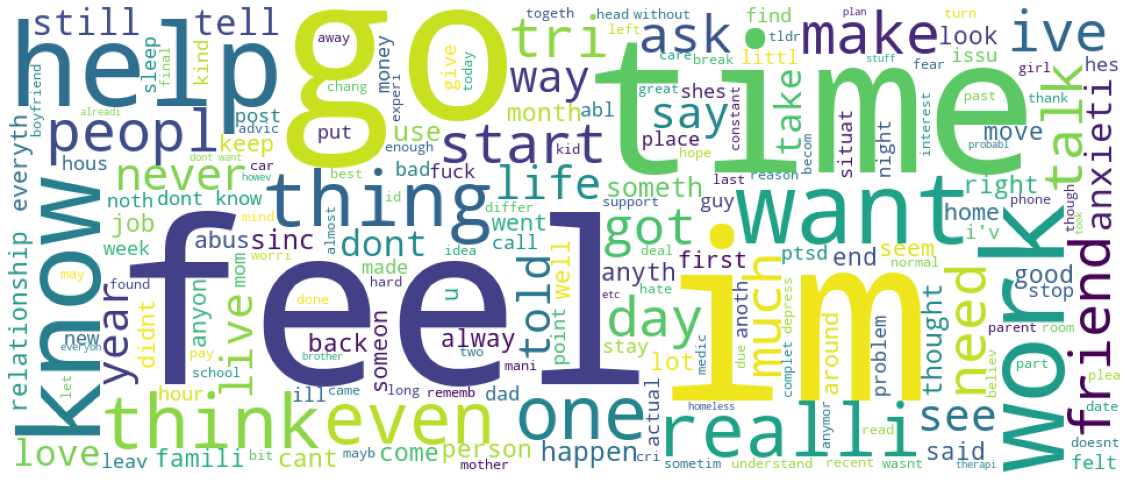

In [29]:
wc(df2.text,'white')

In [30]:
df2["label"]=df["label"].map({0: "No Stress", 1: "Stress"})
df2=df2[["text", "label"]]

In [31]:
df2.head()

,text,label
0,said felt way sugget go rest trigger ahead you...,Stress
1,hey rassist sure right place post goe im curr...,No Stress
2,mom hit newspap shock would know dont like pla...,Stress
3,met new boyfriend amaz kind sweet good student...,Stress
4,octob domest violenc awar month domest violenc...,Stress


In [32]:
df2["sentiment"]=df2["text"].apply(detect_sentiment)

In [33]:
df2.head()

,text,label,sentiment
0,said felt way sugget go rest trigger ahead you...,Stress,0.027273
1,hey rassist sure right place post goe im curr...,No Stress,0.340816
2,mom hit newspap shock would know dont like pla...,Stress,0.124091
3,met new boyfriend amaz kind sweet good student...,Stress,0.229172
4,octob domest violenc awar month domest violenc...,Stress,0.083333


In [34]:
import seaborn as sns

<AxesSubplot:xlabel='label', ylabel='count'>

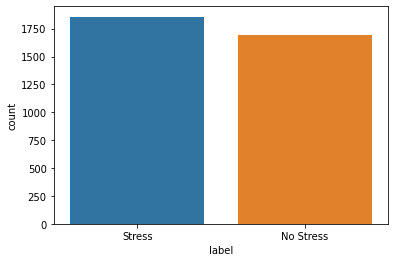

In [35]:
sns.countplot(x=df2.label)

In [36]:
x=df2.text
y=df2.label

In [37]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [38]:
vect=CountVectorizer(stop_words="english")

In [39]:
x=vect.fit_transform(x)

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [41]:
mb=MultinomialNB()

In [42]:
tahmin=mb.fit(x_train,y_train).predict(x_test)

In [43]:
accuracy_score(tahmin,y_test)

0.7401574803149606

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
d=DecisionTreeClassifier()

In [46]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [47]:
tahmin1=d.predict(x_test)

In [48]:
accuracy_score(y_test,tahmin1)

0.6242969628796401

### Now let's test the performance of our model on some random sanity-based sentences:

In [52]:
user="Sometime I feel like I need some help"


In [53]:

df2=vect.transform([user]).toarray()
output=d.predict(df2)
print(output)

['Stress']
